<a href="https://colab.research.google.com/github/Arush0113/ArushTensorflowRepo/blob/main/CVA_for_Anomaly_Detection_on_CSTR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Siemens/PCA Code implementation/CSTR_Dataset_pg1.xlsx')

In [5]:
df.columns = ['Sample no.', "T(K)", "Ca(kmol/m3)", "Fc(m3/min)", "Fa(m3/min)", "Fs(m3/min)", "Tc(K)", "T0(K)", "Cas(kmol/m3)", "Caa(kmol/m3)"]

In [6]:
df.pop("Sample no.")

0          1
1          2
2          3
3          4
4          5
        ... 
1996    1997
1997    1998
1998    1999
1999    2000
2000    2001
Name: Sample no., Length: 2001, dtype: int64

In [9]:
df.head()

,T(K),Ca(kmol/m3),Fc(m3/min),Fa(m3/min),Fs(m3/min),Tc(K),T0(K),Cas(kmol/m3),Caa(kmol/m3)
0,368.273299,0.805825,15.151444,0.953109,0.102330,365.312143,370.312143,0.155825,19.470391
1,370.376594,1.113809,18.401186,0.997108,0.097108,365.446832,370.446832,0.063824,19.474524
2,368.930517,1.102119,16.809295,0.883495,0.099910,364.915681,369.915681,0.097536,19.013437
3,368.846729,1.097286,16.883064,0.910297,0.100750,365.066484,370.066484,0.099324,19.185236
4,368.457310,1.100769,16.445902,0.966227,0.101695,365.365040,370.365040,0.154238,19.507422


In [8]:
df.describe()

,T(K),Ca(kmol/m3),Fc(m3/min),Fa(m3/min),Fs(m3/min),Tc(K),T0(K),Cas(kmol/m3),Caa(kmol/m3)
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,368.246764,1.086137,15.566892,0.898622,0.099988,364.986877,369.986877,0.099172,19.088222
std,0.476978,0.082938,0.892952,0.072865,0.002023,0.529603,0.529603,0.040163,0.536051
min,366.690682,0.805825,12.189397,0.793864,0.093671,363.322356,368.322356,0.034179,17.793212
25%,367.935743,1.024720,14.942439,0.829934,0.098587,364.639190,369.639190,0.062332,18.718914
50%,368.262712,1.079449,15.543109,0.900043,0.099956,365.000619,370.000619,0.098805,19.104852
75%,368.565272,1.143312,16.181407,0.965542,0.101285,365.344922,370.344922,0.134927,19.464282
max,370.376594,1.353108,19.285407,1.007573,0.107573,367.037530,372.037530,0.168932,20.339983


### **Data Scaling**

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(df)
dfx = pd.DataFrame(data=X,columns=df.columns)

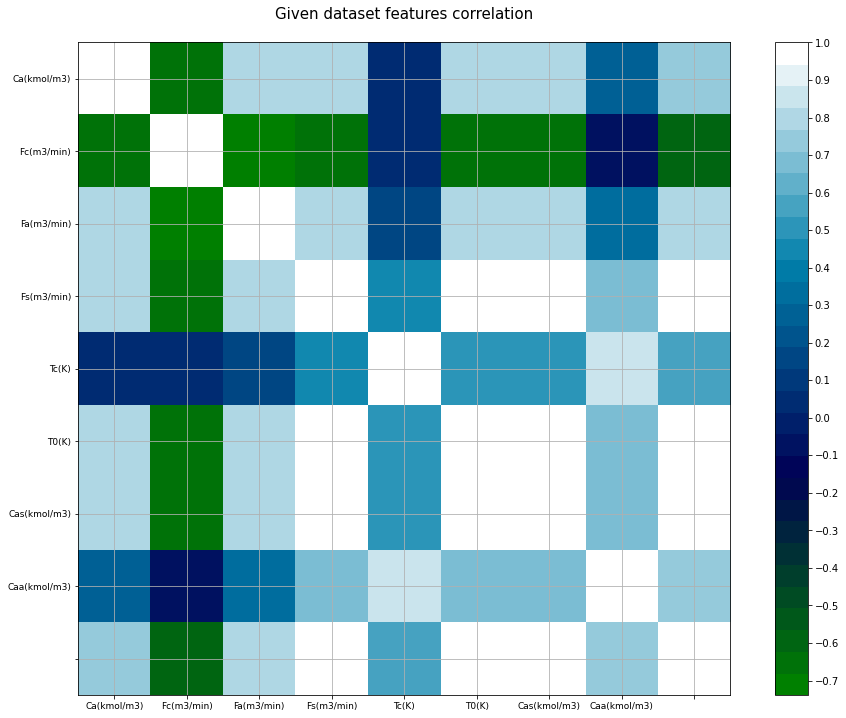

In [12]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('ocean', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Given dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(dfx)

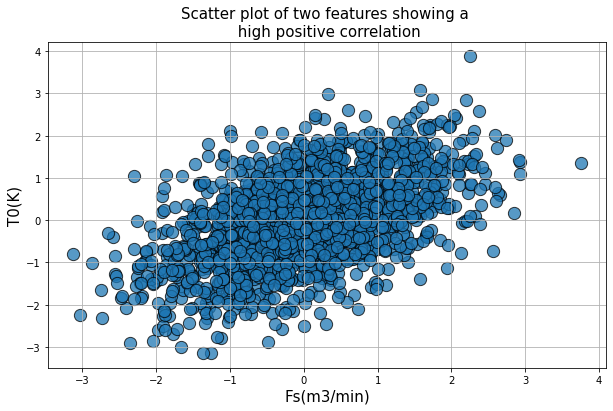

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(dfx['Fs(m3/min)'],dfx['T0(K)'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing a \n high positive correlation",fontsize=15)
plt.xlabel("Fs(m3/min)",fontsize=15)
plt.ylabel("T0(K)",fontsize=15)
plt.show()

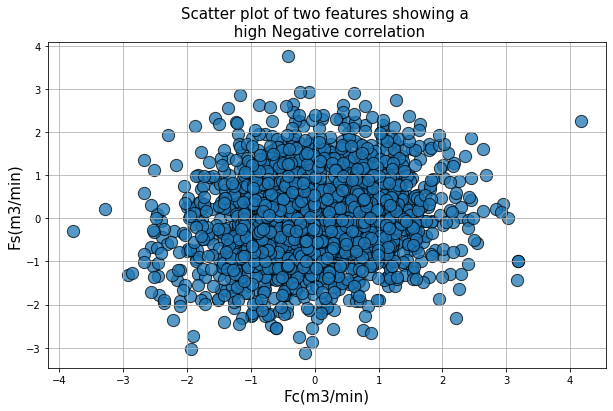

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(dfx['Fc(m3/min)'], dfx['Fs(m3/min)'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing a \n high Negative correlation",fontsize=15)
plt.xlabel("Fc(m3/min)",fontsize=15)
plt.ylabel("Fs(m3/min)",fontsize=15)
plt.show()

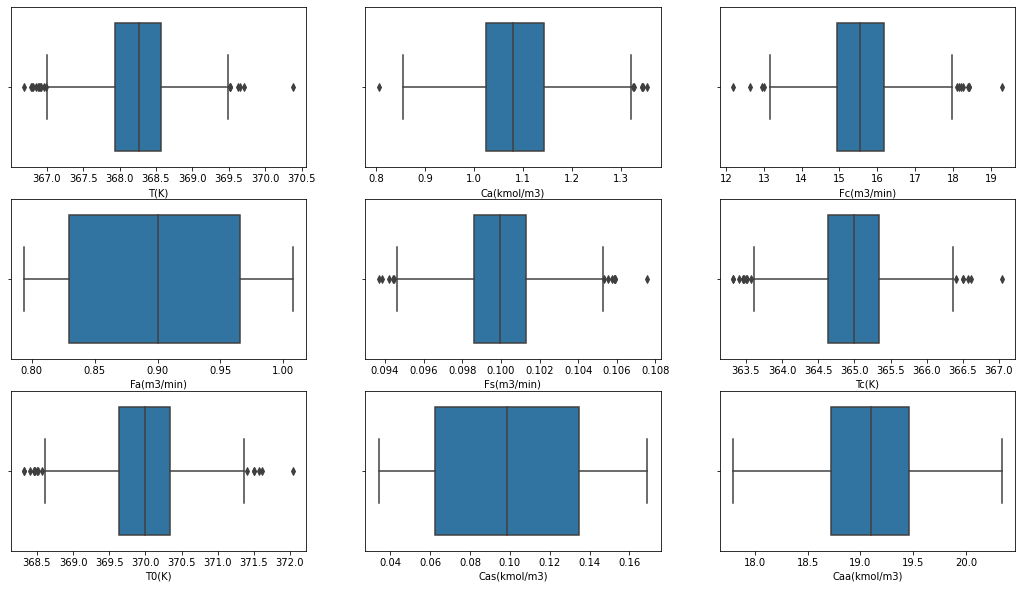

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.boxplot(ax = axes[0, 0], x = df["T(K)"])
sns.boxplot(ax = axes[0, 1], x = df["Ca(kmol/m3)"])
sns.boxplot(ax = axes[0, 2], x = df["Fc(m3/min)"])
sns.boxplot(ax = axes[1, 0], x = df["Fa(m3/min)"])
sns.boxplot(ax = axes[1, 1], x = df["Fs(m3/min)"])
sns.boxplot(ax = axes[1, 2], x = df["Tc(K)"])
sns.boxplot(ax = axes[2, 0], x = df["T0(K)"])
sns.boxplot(ax = axes[2, 1], x = df["Cas(kmol/m3)"])
sns.boxplot(ax = axes[2, 2], x = df["Caa(kmol/m3)"])

# **Canonical Variate Analysis**